In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
col_names = ['Age','JOB_admin.','JOB_blue-collar','JOB_entrepreneur','JOB_housemaid','JOB_management','JOB_retired','JOB_self-employed',
                'JOB_services','JOB_student','JOB_technician','JOB_unemployed','JOB_unknown','Marital_divorced','Marital_married','Marital_single',
                'Marital_unknown','Education_basic.4y','Education_basic.6y','Education_basic.9y','Education_high.school','Education_illiterate',
                'Education_professional.course','Education_university.degree','Education_unknown','Creditviolation_no','Creditviolation_unknown',
                'Creditviolation_yes','Mortgage_no','Mortgage_unknown','Mortgage_yes','Loan_no','Loan_unknown','Loan_yes','Contact',
                'Month_CPI_CCI_1','Month_CPI_CCI_2','Month_CPI_CCI_3','Month_CPI_CCI_4','Month_CPI_CCI_5','Month_CPI_CCI_6','Month_CPI_CCI_7',
                'Month_CPI_CCI_8','Month_CPI_CCI_9','Month_CPI_CCI_10','Month_CPI_CCI_11','Month_CPI_CCI_12','Month_CPI_CCI_13',
                'Month_CPI_CCI_14','Month_CPI_CCI_15','Month_CPI_CCI_16','Month_CPI_CCI_17','Month_CPI_CCI_18','Month_CPI_CCI_19',
                'Month_CPI_CCI_20','Month_CPI_CCI_21','Month_CPI_CCI_22','Month_CPI_CCI_23','Month_CPI_CCI_24','Month_CPI_CCI_25',
                'Month_CPI_CCI_26','DOW_mon','DOW_tue','DOW_wed','DOW_thu','DOW_fri','Duration','Campaign','Pdays_0','Pdays_1','Pdays_2',
                'Pdays_3','Pdays_4','Pdays_5','Pdays_6','Pdays_7','Pdays_8','Pdays_9','Pdays_10','Pdays_11','Pdays_12','Pdays_13','Pdays_14',
                'Pdays_15','Pdays_16','Pdays_17','Pdays_18','Pdays_19','Pdays_20','Pdays_21','Pdays_22','Pdays_25','Pdays_26','Pdays_27',
                'Pdays_999','Previous','Poutcome_failure','Poutcome_nonexistent','Poutcome_success','EVR','NE','Subscription','Y']
# load datasetSex
data = pd.read_csv("Bank_Normalization_New_v2.csv", header=None, names=col_names)

In [12]:
data.head()

,Age,JOB_admin.,JOB_blue-collar,JOB_entrepreneur,JOB_housemaid,JOB_management,JOB_retired,JOB_self-employed,JOB_services,JOB_student,...,Pdays_27,Pdays_999,Previous,Poutcome_failure,Poutcome_nonexistent,Poutcome_success,EVR,NE,Subscription,Y
0,0.271605,0,0,0,0,0,0,1,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4857
1,0.469136,0,0,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4857
2,0.395062,0,0,1,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,1,4857
3,0.506173,0,0,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4857
4,0.345679,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,1,4857


In [13]:
from tkinter import Y
feature_cols = ['Age','JOB_admin.','JOB_blue-collar','JOB_entrepreneur','JOB_housemaid','JOB_management','JOB_retired','JOB_self-employed',
                'JOB_services','JOB_student','JOB_technician','JOB_unemployed','JOB_unknown','Marital_divorced','Marital_married','Marital_single',
                'Marital_unknown','Education_basic.4y','Education_basic.6y','Education_basic.9y','Education_high.school','Education_illiterate',
                'Education_professional.course','Education_university.degree','Education_unknown','Creditviolation_no','Creditviolation_unknown',
                'Creditviolation_yes','Mortgage_no','Mortgage_unknown','Mortgage_yes','Loan_no','Loan_unknown','Loan_yes','Contact',
                'Month_CPI_CCI_1','Month_CPI_CCI_2','Month_CPI_CCI_3','Month_CPI_CCI_4','Month_CPI_CCI_5','Month_CPI_CCI_6','Month_CPI_CCI_7',
                'Month_CPI_CCI_8','Month_CPI_CCI_9','Month_CPI_CCI_10','Month_CPI_CCI_11','Month_CPI_CCI_12','Month_CPI_CCI_13',
                'Month_CPI_CCI_14','Month_CPI_CCI_15','Month_CPI_CCI_16','Month_CPI_CCI_17','Month_CPI_CCI_18','Month_CPI_CCI_19',
                'Month_CPI_CCI_20','Month_CPI_CCI_21','Month_CPI_CCI_22','Month_CPI_CCI_23','Month_CPI_CCI_24','Month_CPI_CCI_25',
                'Month_CPI_CCI_26','DOW_mon','DOW_tue','DOW_wed','DOW_thu','DOW_fri','Duration','Campaign','Pdays_0','Pdays_1','Pdays_2',
                'Pdays_3','Pdays_4','Pdays_5','Pdays_6','Pdays_7','Pdays_8','Pdays_9','Pdays_10','Pdays_11','Pdays_12','Pdays_13','Pdays_14',
                'Pdays_15','Pdays_16','Pdays_17','Pdays_18','Pdays_19','Pdays_20','Pdays_21','Pdays_22','Pdays_25','Pdays_26','Pdays_27',
                'Pdays_999','Previous','Poutcome_failure','Poutcome_nonexistent','Poutcome_success','EVR','NE','Subscription','Y']
X = data[feature_cols] # Features
y = data.Y # Target variable
y

0        4857
1        4857
2        4857
3        4857
4        4857
         ... 
41183    1028
41184    1028
41185    1028
41186    1028
41187    1028
Name: Y, Length: 41188, dtype: int64

In [14]:
data2 = preprocessing.normalize(data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(data)
data3 = scaler.transform(data)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
X_train.shape

(28831, 103)

In [10]:
#training
trainingPath=r'adult _data(N)_v1.csv'
trainingData=[]
import csv
with open(trainingPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     trainingData.append(r)
Xtraining=[]
ytraining=[]
#Feature Label
feature=[]
#Pure Data
pureData=[]
for r in range(0,len(trainingData)):
    #Row Data
    rowData=[]
    for c in range(0,len(trainingData[r])):
        rowData.append(trainingData[r][c])
    if(r==0):
        feature=rowData
    else:
        pureData.append(rowData)
X_train=[]
y_train=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X_train.append(rowData)
    y_train.append(float(pureData[r][len(pureData[r])-1]))
#test
testPath=r'adult _test(N)_v1.csv'
testData=[]
import csv
with open(testPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     testData.append(r)
#Pure Data
pureData=[]
for r in range(0,len(testData)):
    #Row Data
    rowData=[]
    for c in range(0,len(testData[r])):
        rowData.append(testData[r][c])
    if(r!=0):
        pureData.append(rowData)
X_test=[]
y_test=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X_test.append(rowData)
    y_test.append(float(pureData[r][len(pureData[r])-1]))

In [11]:
randomForestModel = RandomForestRegressor(n_estimators=50)
randomForestModel.fit(X_train, y_train)
y_pred_rf = randomForestModel.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_rf))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_rf,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_rf))

MAE: 7.451135728041134
RMSE : 10.81
MAPE: 0.27014146571064573


In [12]:
print(randomForestModel.score(X_train,y_train))
print(randomForestModel.score(X_test, y_test))

0.883271589103296
0.19650958796288753


score_array [1.0]
 
score_array_MAX: 1.0
----------------------------------------------------------------------------------------------------------
score_array_test [0.9452132394594157]
 
score_array_test_MAX: 0.9452132394594157
[1.0]
[0.9452132394594157]


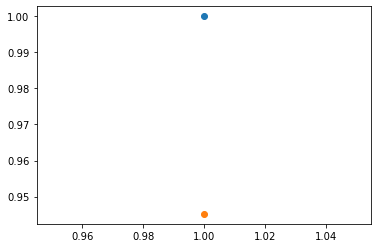

In [26]:
score_array= []
score_array_test= []
y_pred_knn = RandomForestClassifier(n_estimators=100, criterion = 'gini')
y_pred_knn.fit(X_train, y_train)
score_val = y_pred_knn.score(X_train, y_train)
score_test = y_pred_knn.score(X_test, y_test)
score_array.append(score_val)
score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
print(score_array)
print(score_array_test)
xx=range(1,len(score_array))
plt.scatter(1,score_array)
plt.scatter(1,score_array_test)